In [386]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

ds=pd.read_csv("diamonds.csv")

In [387]:
ds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [388]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [389]:
ds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [390]:
ds["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [391]:
#droping the 1st column that is the row num
ds.drop(columns="Unnamed: 0",inplace=True)

In [392]:
#Finding the non numerical features
cat_col = ds.select_dtypes(['object']).columns

In [393]:
cat_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [394]:
ds[cat_col]=ds[cat_col].apply(lambda x: pd.factorize(x)[0])

In [395]:
ds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,0,61.0,58.0,2757,6.15,6.12,3.74


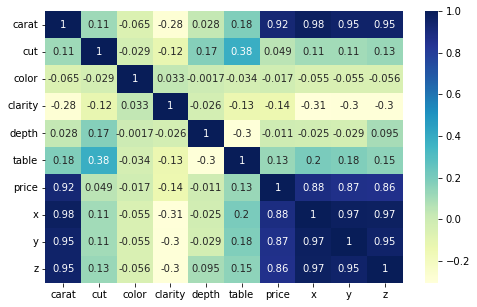

In [396]:
#plt.figure.Figure(figsize = (50, 10))
fig = plt.figure(figsize =(8, 5))
sn.heatmap(ds.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [397]:
# removing the rows with any of the measurement is 0
#ds.drop(ds.loc[(ds['x']==0) | (ds['y']==0) | (ds['z']==0)].index, inplace=True)
ds=ds[ds["x"]!=0]
ds=ds[ds["y"]!=0]
ds=ds[ds["z"]!=0]

In [398]:
ds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,1.228913,3.174091,2.256250,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.266077,2.050345,1.766337,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,1.000000,4.000000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,3.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


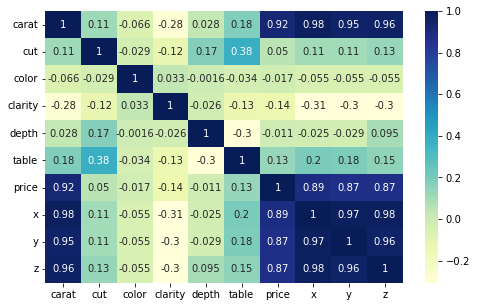

In [399]:
fig = plt.figure(figsize =(8, 5))
sn.heatmap(ds.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [400]:
ds.drop(columns=["x","y","z"],inplace=True)

In [401]:
ds

,carat,cut,color,clarity,depth,table,price
0,0.23,0,0,0,61.5,55.0,326
1,0.21,1,0,1,59.8,61.0,326
2,0.23,2,0,2,56.9,65.0,327
3,0.29,1,1,3,62.4,58.0,334
4,0.31,2,2,0,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757
53936,0.72,2,6,1,63.1,55.0,2757
53937,0.70,3,6,1,62.8,60.0,2757
53938,0.86,1,3,0,61.0,58.0,2757


In [402]:
ds.duplicated().sum()

802

In [403]:
ds.loc[ds.duplicated(),:]

,carat,cut,color,clarity,depth,table,price
438,0.70,0,3,1,61.4,56.0,2815
786,0.62,0,5,4,61.6,56.0,2861
836,0.82,0,4,0,62.3,56.0,2867
951,0.50,0,0,4,62.2,54.0,2889
1005,0.79,0,5,1,62.3,57.0,2898
...,...,...,...,...,...,...,...
53312,0.72,0,1,3,61.7,56.0,2650
53639,0.30,0,6,1,61.0,56.0,552
53736,0.70,0,5,3,62.3,57.0,2723
53738,0.70,0,5,3,62.3,57.0,2723


In [404]:
ds.drop_duplicates(inplace=True)

In [405]:
ds

,carat,cut,color,clarity,depth,table,price
0,0.23,0,0,0,61.5,55.0,326
1,0.21,1,0,1,59.8,61.0,326
2,0.23,2,0,2,56.9,65.0,327
3,0.29,1,1,3,62.4,58.0,334
4,0.31,2,2,0,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757
53936,0.72,2,6,1,63.1,55.0,2757
53937,0.70,3,6,1,62.8,60.0,2757
53938,0.86,1,3,0,61.0,58.0,2757


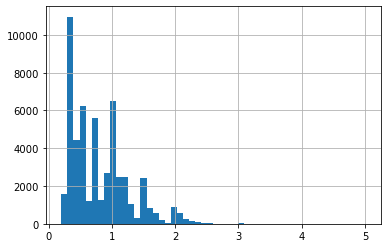

<Figure size 576x360 with 0 Axes>

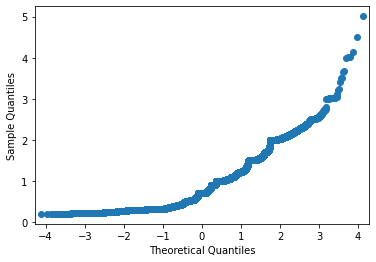

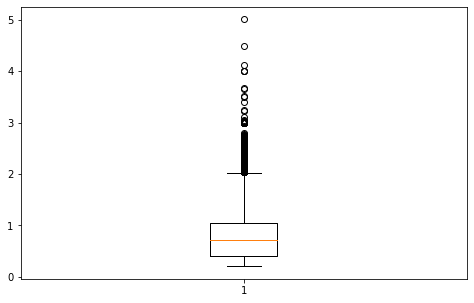

In [406]:
#ds.carat.plot.density()
#plotting the carat feature on differnt graphs
ds["carat"].hist(bins=50)
fig = plt.figure(figsize =(8, 5))
sm.qqplot(ds["carat"])
fig = plt.figure(figsize =(8, 5))
plt.boxplot(ds["carat"])
plt.show()

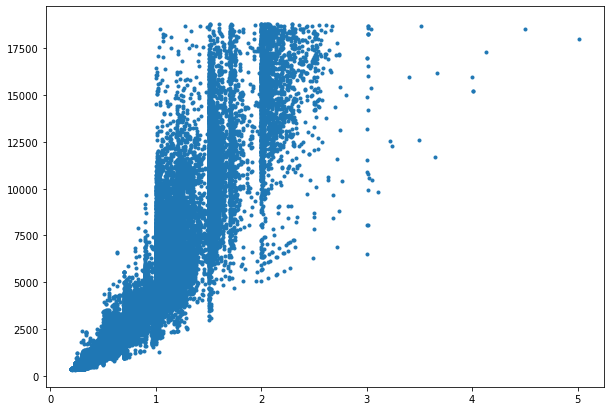

In [407]:
fig = plt.figure(figsize =(10, 7))
plt.scatter(ds["carat"],ds["price"],marker='.')
plt.show()

In [408]:
#shuffle and split test and train data
ds=ds.sample(frac=1)
#adding a colunm for w0
ds.insert(0,'b',1)

In [424]:
class UniLinearRegression():

    def closed_form(self,x,y):
        # x -- n*2 , y --n*1 for univarient
        #self.w=(y.sum()-x.shape[0]*self.b)/x.sum()
        w=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
        return w

    def differentiation(self,x,y,y_pred):
        dw=(-1/x.shape[0])*np.dot(x.T,y-y_pred)
        return dw

    def gradientdescent(self,x,y,y_pred,w):
        learningrate=0.003
        for i in range(10000):
            dw=self.differentiation(x,y,y_pred)
            w=w-learningrate*dw
            y_pred=np.dot(x,w)
        return w

    def predict(self,x_test,w):
        y_pred = np.dot(x_test,w)
        return y_pred
    def lossfuntion(self,y_test,y_pred):
        return (1/y_test.shape[0])*((y_test - y_pred)**2).sum()

In [448]:
"""
Univarient

Data Split
"""

#print(ds)
x_train=ds.iloc[:int(ds.shape[0]*0.8),:2]
y_train=ds.iloc[:int(ds.shape[0]*0.8),7]
x_test=ds.iloc[int(ds.shape[0]*0.8):,:2]
y_test=ds.iloc[int(ds.shape[0]*0.8):,7]
#print(y_train)

# arr=x_train.values
# x_train=arr.reshape((x_train.shape[0],1))

arr=y_train.values
y_train=arr.reshape((y_train.shape[0],1))

# arr=x_test.values
# x_test=arr.reshape((x_test.shape[0],1))

arr=y_test.values
y_test=arr.reshape((y_test.shape[0],1))


[[-2277.95281611]
 [ 7778.23254378]]
mean squred loss: 2483188.1778810127


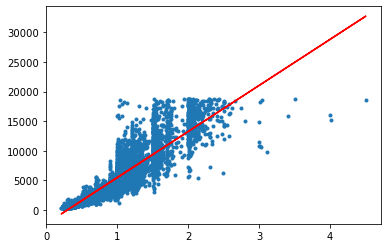

In [449]:
"""
Univarient Linear regression using carat

Closed Form
"""
#
model=UniLinearRegression()
#print(y_train.T.shape)
w=model.closed_form(x_train,y_train)
print(w)
y_pred=model.predict(x_test,w)
#print(x_test)
plt.scatter(x_test["carat"],y_test,marker='.')
plt.plot(x_test["carat"],y_pred,color='red')
print("mean squred loss:",model.lossfuntion(y_test,y_pred))

[[-2172.89591637]
 [ 7664.08187232]]
mean squred error: 2485427.0657539703


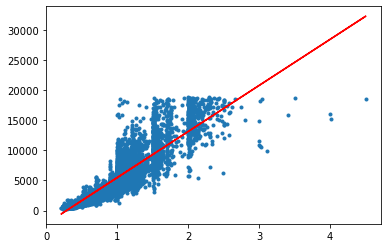

In [450]:
"""
Univarient Linear regression using carat

Gradient descent
"""
# print(y_test)

w=np.full((x_train.shape[1],1),0.0)
y_pred=np.dot(x_train,w)
w=model.gradientdescent(x_train,y_train,y_pred,w)
print(w)
y_pred=model.predict(x_test,w)
plt.scatter(x_test["carat"],y_test,marker='.')
plt.plot(x_test["carat"],y_pred,color='red')
print("mean squred error:",model.lossfuntion(y_test,y_pred))

In [451]:
"""
Multi varient linear regression

split data
"""

x_m_train=ds.iloc[:int(ds.shape[0]*0.8),:7]
y_m_train=ds.iloc[:int(ds.shape[0]*0.8),7]
x_m_test=ds.iloc[int(ds.shape[0]*0.8):,:7]
y_m_test=ds.iloc[int(ds.shape[0]*0.8):,7]
print(x_m_train)

#converting to numpy
arr=y_m_train.values
y_m_train=arr.reshape((y_m_train.shape[0],1))


#converting to numpy
arr=y_m_test.values
y_m_test=arr.reshape((y_m_test.shape[0],1))

print(y_m_test.shape)

       b  carat  cut  color  clarity  depth  table
27560  1   2.20    1      1        3   62.0   57.0
31422  1   0.40    0      4        0   61.5   56.0
22107  1   1.50    2      4        3   64.0   56.0
1607   1   0.75    0      3        1   61.9   56.0
50063  1   0.80    1      2        2   61.6   60.0
...   ..    ...  ...    ...      ...    ...    ...
43602  1   0.31    2      5        3   63.2   58.0
16075  1   1.25    0      1        3   62.5   56.0
53785  1   0.89    2      0        0   64.3   65.0
48882  1   0.73    1      2        2   60.2   58.0
36344  1   0.32    0      3        5   61.9   55.0

[42494 rows x 7 columns]
(10624, 1)


In [452]:
"""Multi varient linear regression

Closed form
"""
w=model.closed_form(x_m_train,y_m_train)
print(w)
y_m_pred=model.predict(x_m_test,w)
#print(x_test)
# plt.scatter(x_m_test,y_m_test,marker='.')
# plt.plot(x_m_test,y_m_pred,color='red')
print("mean squred loss:",model.lossfuntion(y_m_test,y_m_pred))



[[7150.95789762]
 [8170.88844661]
 [ -83.42102503]
 [  82.56463166]
 [ 276.31554811]
 [-117.62875474]
 [ -56.75146508]]
mean squred loss: 2149102.982339243


In [453]:
"""
Multivarient Linear regression

Gradient descent
"""
w=np.full((x_m_train.shape[1],1),0.0)
y_m_pred=np.dot(x_m_train,w)
w=model.gradientdescent(x_m_train,y_m_train,y_m_pred,w)
print(w)
y_m_pred=model.predict(x_m_test,w)
# plt.scatter(x_test["carat"],y_test,marker='.')
# plt.plot(x_test["carat"],y_pred,color='red')
print("mean squred error:",model.lossfuntion(y_m_test,y_m_pred))

C:\Users\Admin\AppData\Local\Temp\ipykernel_14436\3073917344.py:17: RuntimeWarning: invalid value encountered in subtract
  w=w-learningrate*dw


[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
mean squred error: nan
